# Online Transactions Fraud Detection 

The goal of this project is to develop a predictive solution for online fraud detection, leveraging machine learning models on historical data. The project also aims to  analyze large amounts of data using big data technologies and to provide various data visualization options in solving real-world problems. 
The benefits of this project include improved online fraud detection, which is crucial in reducing financial losses and increasing trust in online transactions.

# Problem statement:-
Online payment fraud detection is a common problem that businesses face when processing payments online. 
The goal is to detect fraudulent transactions before they are processed and approved, in order to prevent 
financial losses and protect the business and its customers.
Full flow:-
The goal of this project is to develop a predictive solution for online fraud detection, leveraging machine 
learning models on historical data. The project also aims to analyze large amounts of data using big data technologies 
and to provide various data visualization options in solving real-world problems
Future scope:-
This involves using machine learning algorithms to analyze transactions in real-time, looking for patterns or 
anomalies that may indicate fraud. For example, a sudden increase in the number of transactions or a change in 
transaction patterns may indicate fraudulent activity

# Technology Used :- Python(ML), BigData, PowerBI

In [54]:
#important Librarires for data processing and Visualization
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [55]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")

# Understanding the Dataset

In [56]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [57]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [58]:
#Understanding the size of the DataFrame
df.shape
print("Number of records:\t\t",df.shape[0])
print("Number of features per record:\t",df.shape[1])

Number of records:		 6362620
Number of features per record:	 11


In [59]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [61]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [62]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [63]:
#Checking for any Duplicate records in the Data
print('Number of duplicates are : ', df.duplicated().sum())

Number of duplicates are :  0


In [168]:
np.where(df['amount']<0)

(array([], dtype=int64),)

In [64]:
#Checking for Null Values count in each columns 
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [65]:
#Changing the colunm name as per convience for better understanding of data
df = df.rename(columns = {'nameOrig' : 'origin', 'oldbalanceOrg' : 'sender_old_balance', 'newbalanceOrig': 'sender_new_balance', 'nameDest' : 'destination', 'oldbalanceDest' : 'receiver_old_balance', 'newbalanceDest': 'receiver_new_balance', 'isFraud' : 'isfraud'})

In [66]:
df.nunique()

step                        743
type                          5
amount                  5316900
origin                  6353307
sender_old_balance      1845844
sender_new_balance      2682586
destination             2722362
receiver_old_balance    3614697
receiver_new_balance    3555499
isfraud                       2
isFlaggedFraud                2
dtype: int64

In [67]:
#Now before making changes into the original data we should make a copy of it.
copy_df=df.copy()

# Checking the Data variation

In [68]:
for col in df.iloc[:,:].select_dtypes(include=['object','float64','int64']).columns:
    print(col)
    print("_________________________________________________________________________________________________")
    print(df[col].value_counts())
    print("_________________________________________________________________________________________________")

step
_________________________________________________________________________________________________
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64
_________________________________________________________________________________________________
type
_________________________________________________________________________________________________
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64
_________________________________________________________________________________________________
amount
_________________________________________________________________________________________________
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.

In [69]:
#Checking the data for valid and fraud on the basis of fraud flag

print("No of Valid transactions:",df.isfraud.value_counts()[0],'which is ',round(df.isfraud.value_counts()[0]/df.shape[0] * 100,2),'%')
print("No of Fraud transactions:",df.isfraud.value_counts()[1],'which is ',round(df.isfraud.value_counts()[1]/df.shape[0] * 100,2),'%')

df.isfraud.value_counts()

No of Valid transactions: 6354407 which is  99.87 %
No of Fraud transactions: 8213 which is  0.13 %


0    6354407
1       8213
Name: isfraud, dtype: int64

In [70]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


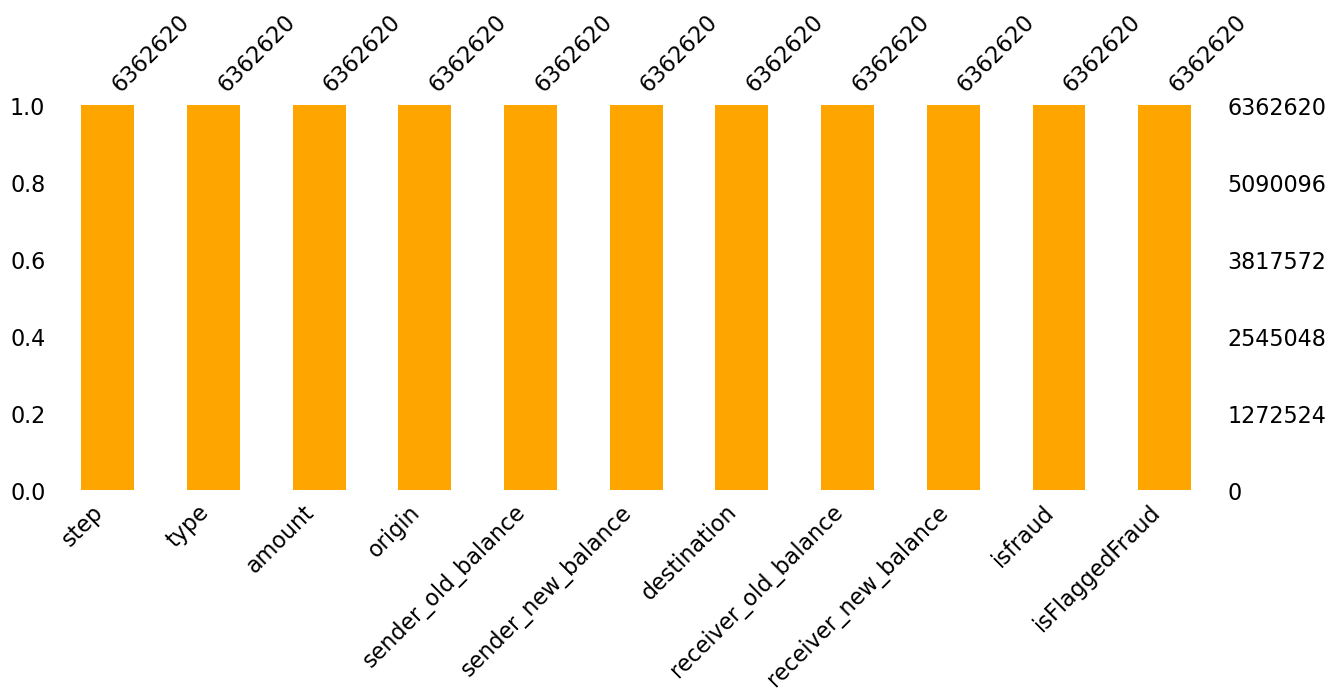

In [71]:
import missingno as msno
plt.figure(figsize = (15, 8))
msno.bar(df, figsize = (15,5), sort = 'ascending', color = "orange")
plt.show()

# Adding a new feature 

In [169]:
df['type2'] = np.nan
df.loc[df.origin.str.contains('C') & df.destination.str.contains('C'), 'type2'] = 'CC'
df.loc[df.origin.str.contains('C') & df.destination.str.contains('M'), 'type2'] = 'CM'
df.loc[df.origin.str.contains('M') & df.destination.str.contains('C'), 'type2'] = 'MC'
df.loc[df.origin.str.contains('M') & df.destination.str.contains('M'), 'type2'] = 'MM'

In [73]:
#Changing the column position for our ease of use.
cols = df.columns.tolist()
new_position = 1
cols.insert(new_position, cols.pop(cols.index('type2')))
df = df[cols]

In [74]:
#Changing the column position for our ease of use.
cols = df.columns.tolist()
new_position = 3
cols.insert(new_position, cols.pop(cols.index('destination')))
df = df[cols]

# Exploring the Data(EDA) by visualisation

# Univariate Analysis

Univariate analysis is used to analyze the data of single variable. Here we will analyze using histplot

In [75]:
col=['step','amount','sender_old_balance','sender_new_balance','receiver_old_balance','receiver_new_balance']


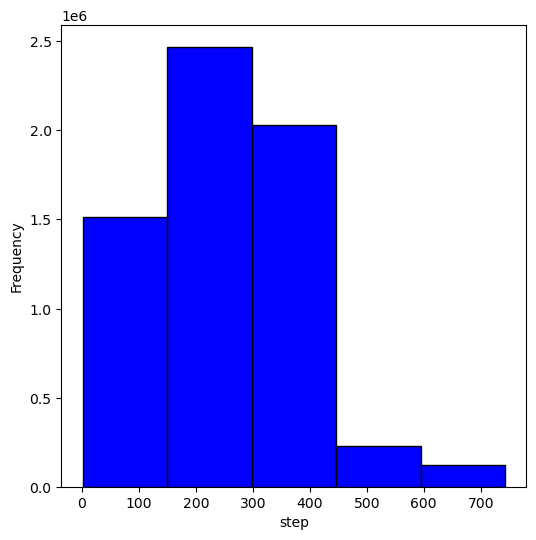

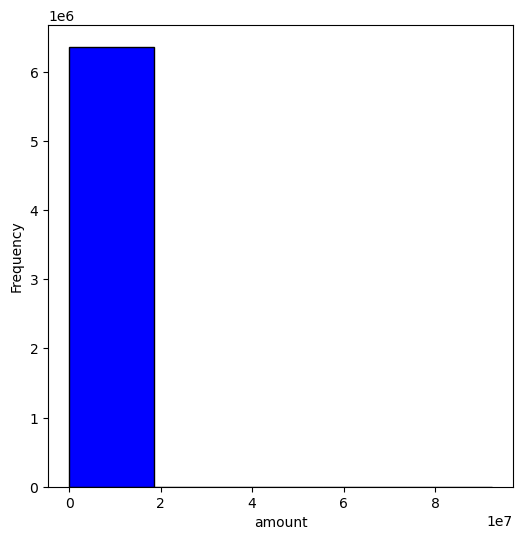

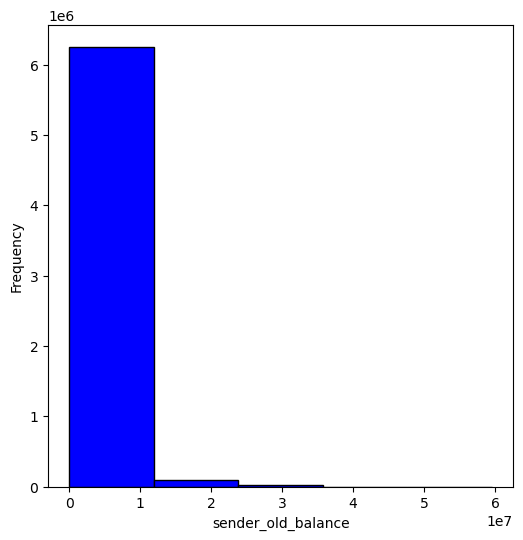

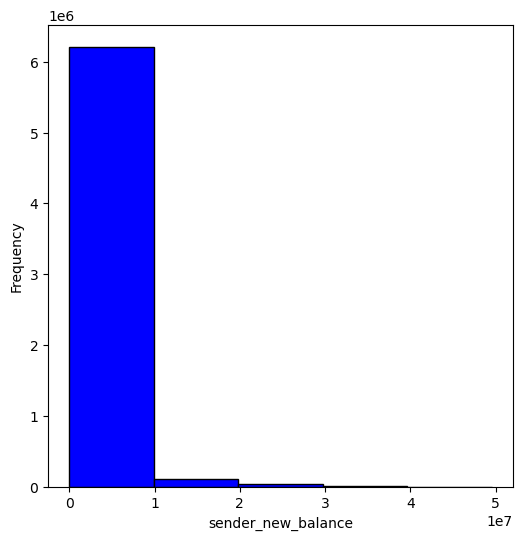

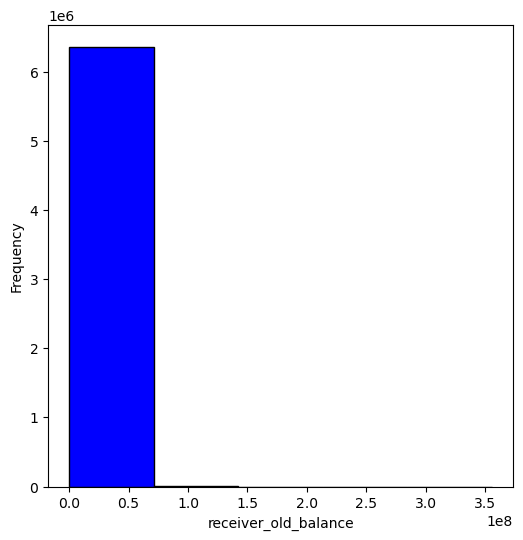

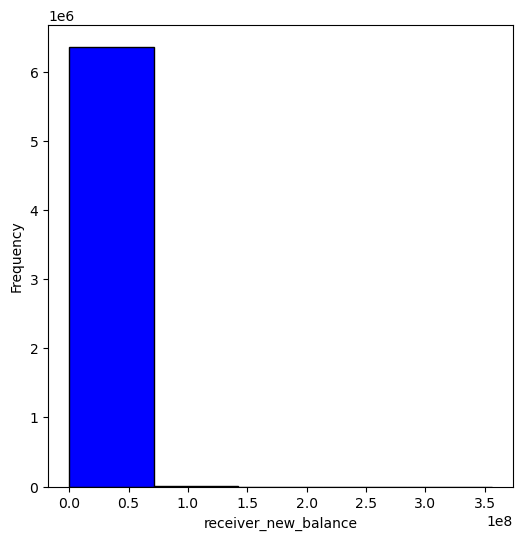

In [76]:


for i in col:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(6,6), facecolor='blue',edgecolor='black')
    plt.show()




<AxesSubplot:>

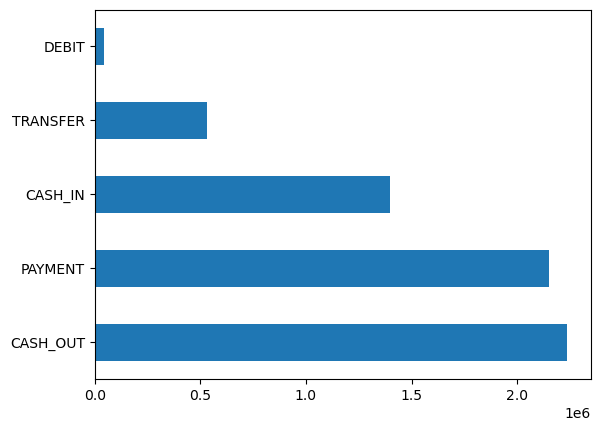

In [77]:

payment = df.type.value_counts()
payment.plot(kind='barh')



    As we have already seen there are 5 types of payment happened.
    More money has been transacted mostly through cash out followed by payment type.
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432

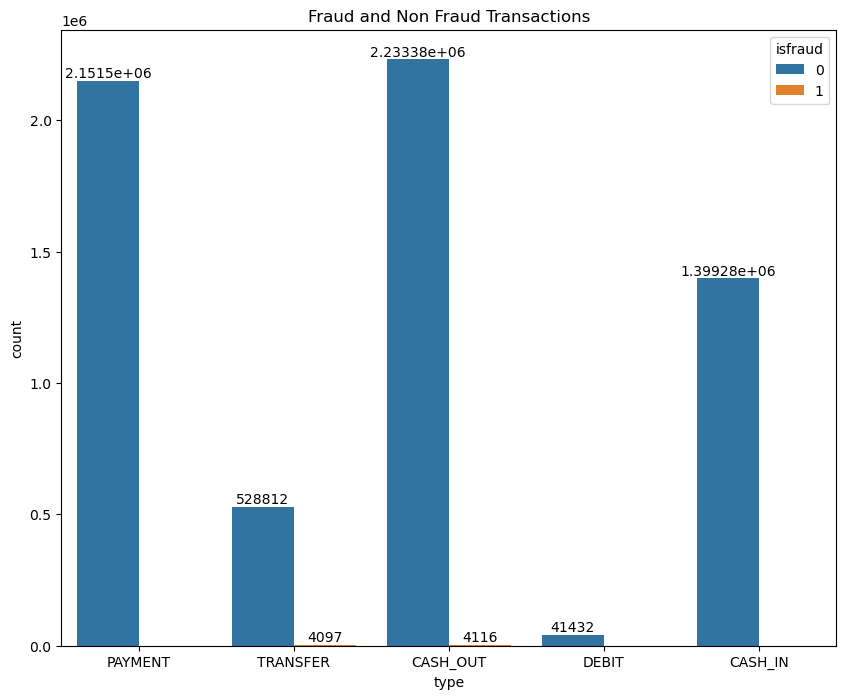

In [78]:
plt.figure(figsize = (10, 8))
ax=sns.countplot(data = df, x = "type", hue="isfraud")
plt.title('Fraud and Non Fraud Transactions')
for container in ax.containers:
    ax.bar_label(container)



We can see that fraud occurred mostly while during transfer or cashout


In [79]:
fraud_trans = df[df['isfraud'] == 1]
valid_trans = df[df['isfraud'] == 0]

print('Number of fraud transactions according to type are below:\n', fraud_trans.type2.value_counts(), '\n')
print('Number of valid transactions according to type are below:\n', valid_trans.type2.value_counts())

Number of fraud transactions according to type are below:
 CC    8213
Name: type2, dtype: int64 

Number of valid transactions according to type are below:
 CC    4202912
CM    2151495
Name: type2, dtype: int64


C:\Users\hello\Desktop\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


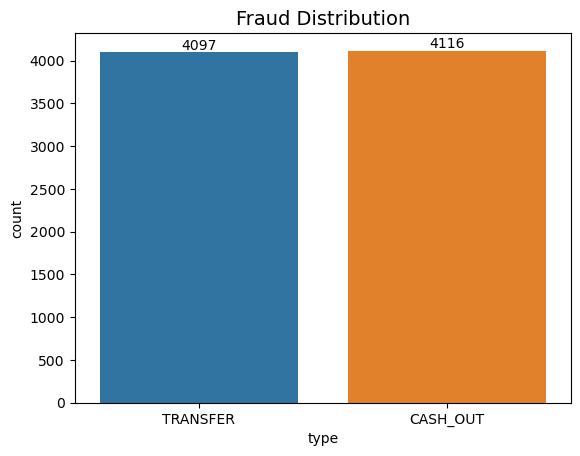

In [80]:
ax=sns.countplot('type', data=fraud_trans)
plt.title('Fraud Distribution', fontsize=14)
for container in ax.containers:
    ax.bar_label(container)


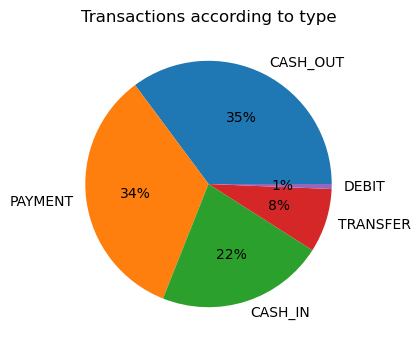

In [81]:
plt.figure(figsize=(10,4))
colors = ['#006400','#008000','#00FF00','#2E8B57','#2F4F4F']
plt.pie(df.type.value_counts().values,labels=df.type.value_counts().index, autopct='%.0f%%')
plt.title("Transactions according to type")
plt.show()

Text(0.5, 1.0, 'Valid')

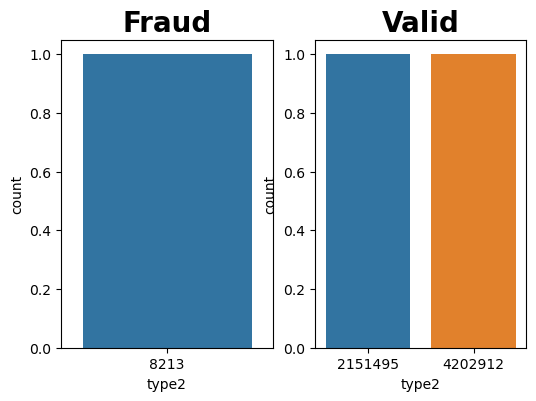

In [82]:
fr = fraud_trans.type2.value_counts()
va = valid_trans.type2.value_counts()
plt.figure(figsize=(6, 4))
plt.subplot(1,2,1)
sns.countplot(x = fr)
plt.title('Fraud',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.countplot(x = va)
plt.title('Valid',fontweight="bold", size=20)

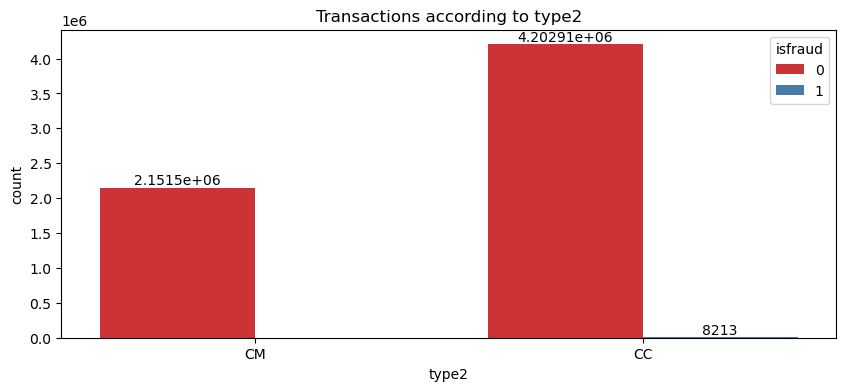

In [170]:
plt.figure(figsize = (10, 4))
ax=sns.countplot(data = df, x = "type2", hue="isfraud", palette = 'Set1')
plt.title('Transactions according to type2')
for container in ax.containers:
    ax.bar_label(container)

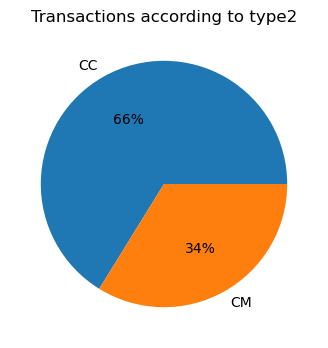

In [171]:
plt.figure(figsize=(10,4))
colors = ['#006400','#008000']
plt.pie(df.type2.value_counts().values,labels=df.type2.value_counts().index,  autopct='%.0f%%')
plt.title("Transactions according to type2")
plt.show()

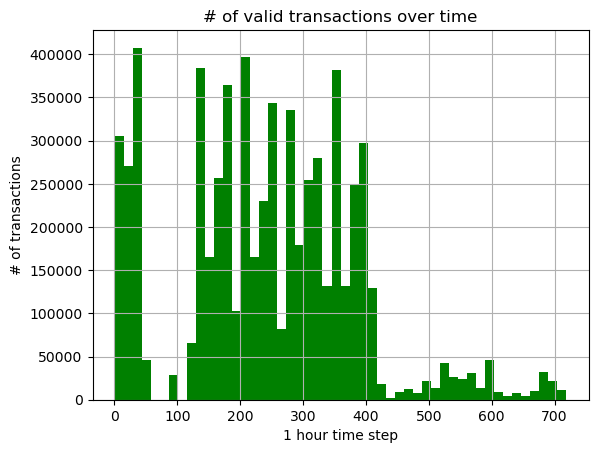

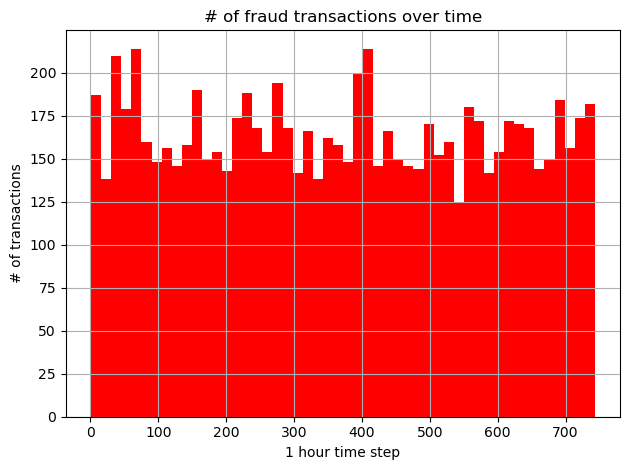

In [85]:
bins = 50

valid_trans.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

fraud_trans.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

plt.tight_layout()
plt.show()

A large proportion of valid transactions occur between around the 0th and 60th timestep as well as the 110th and 410th time-steps.
The frequency at which fraudulent transactions occur does not seem to change much over time

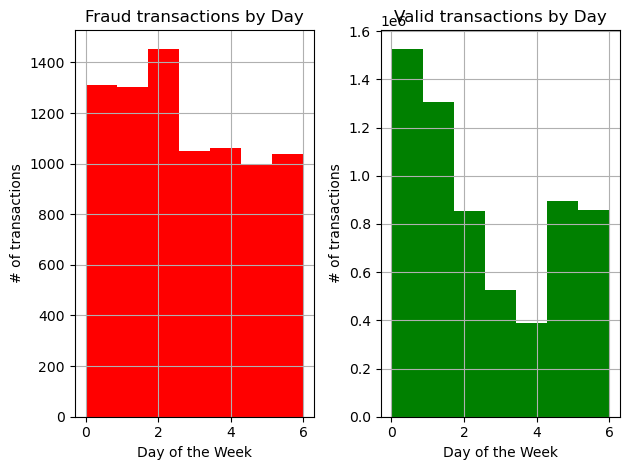

In [86]:
num_days = 7
num_hours = 24
fraud_days = (fraud_trans.step//num_hours)% num_days
fraud_hours = fraud_trans.step % num_hours
valid_days = (valid_trans.step//num_hours) % num_days
valid_hours = valid_trans.step % num_hours

# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()



From the graphs above, there is little evidence to suggest that fraudulent transactions occur at particular days of the week.

While valid transactions occur less on some two consecutive days of the week.


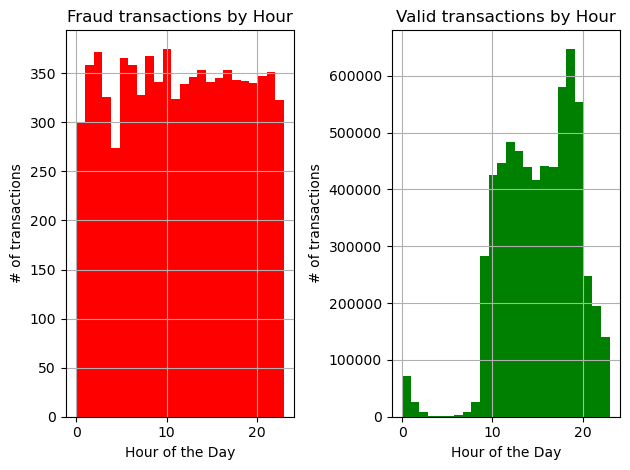

In [87]:
plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()



We observe that from hour 0 to hour 9 valid transactions very seldom occur. On the other hand, fraudulent transactions still occur at similar rates to any hour of the day outside of hours 0 to 9 .

In response to this, We1m will create another feature HourOfDay, which is the step column with each number taken to modulo 24

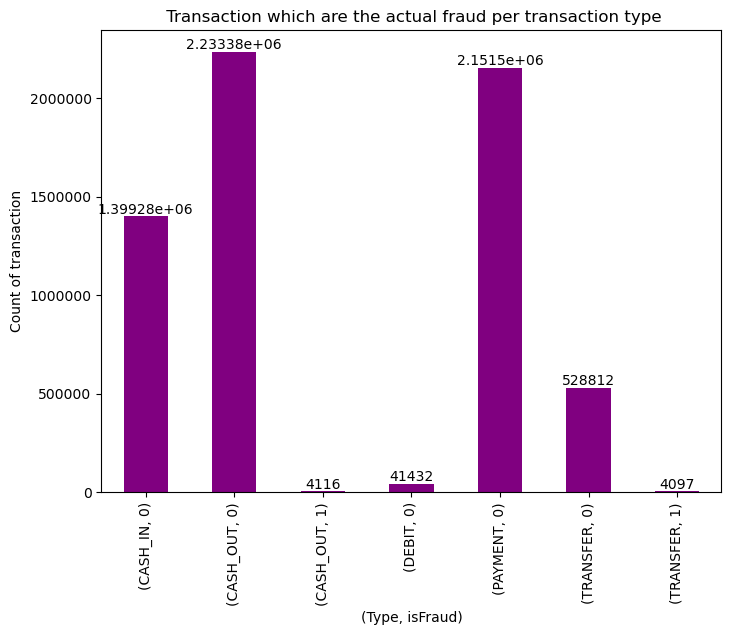

In [88]:


ax = df.groupby(['type', 'isfraud']).size().plot(kind='bar',figsize=(8, 6), color='purple')
ax.set_title(" Transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
plt.ticklabel_format(style='plain', axis='y')
for container in ax.containers:
    ax.bar_label(container)


<AxesSubplot:>

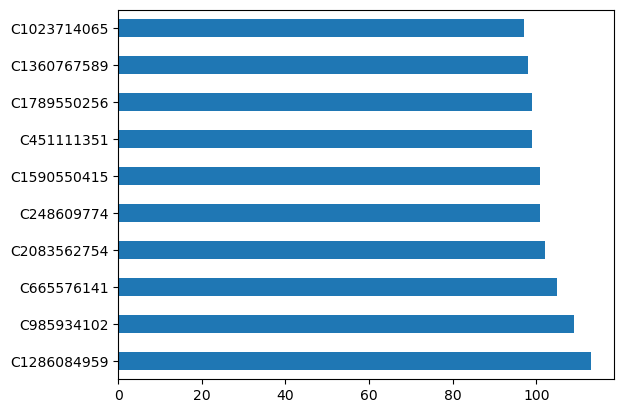

In [89]:
fraudster= df.destination.value_counts()


fraudster[:10].plot(kind='barh')



<AxesSubplot:>

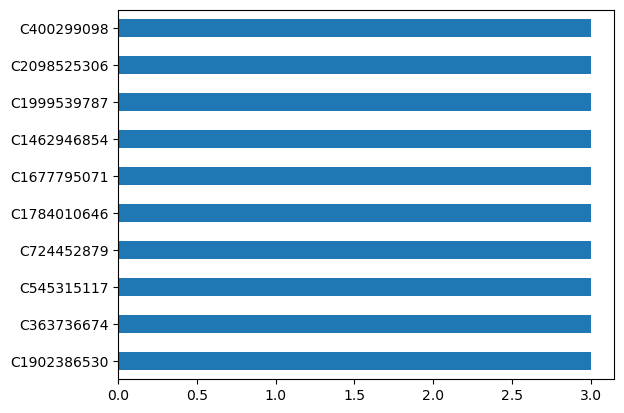

In [90]:
loser= df.origin.value_counts()
loser[:10].plot(kind='barh')

# Bivariate Analysis

<AxesSubplot:>

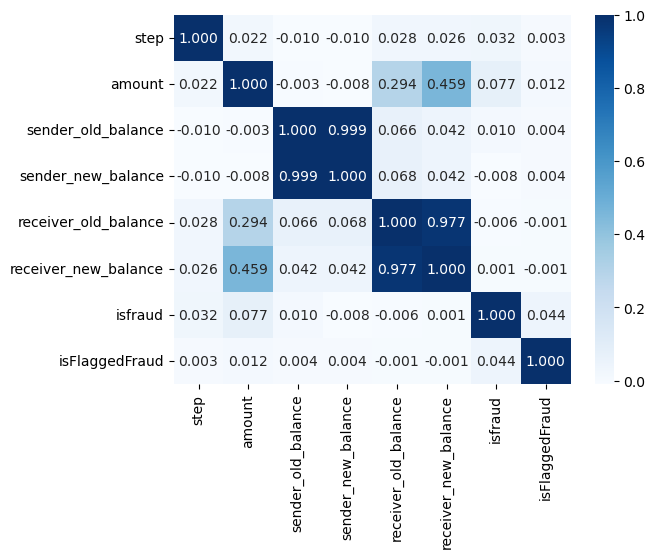

In [91]:


# calculate correlation matrix
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")



In [92]:
corr['isfraud'].sort_values(ascending=False)


isfraud                 1.000000
amount                  0.076688
isFlaggedFraud          0.044109
step                    0.031578
sender_old_balance      0.010154
receiver_new_balance    0.000535
receiver_old_balance   -0.005885
sender_new_balance     -0.008148
Name: isfraud, dtype: float64

In [262]:
data = df.drop(columns = ['step', 'isFlaggedFraud','origin','destination'], axis = 'columns')


In [263]:
data.head()


,type2,type,amount,sender_old_balance,sender_new_balance,receiver_old_balance,receiver_new_balance,isfraud
0,CM,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,CM,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,CC,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CC,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,CM,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [264]:
#Handling Categorical Variables converting them to numerical data for better modelling
#data_new = pd.get_dummies(data,prefix=['type','Type2'])
#Label Encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['type2']= label_encoder.fit_transform(data['type2'])
data['type']= label_encoder.fit_transform(data['type'])
data.head()

,type2,type,amount,sender_old_balance,sender_new_balance,receiver_old_balance,receiver_new_balance,isfraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,0,4,181.00,181.0,0.00,0.0,0.0,1
3,0,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [265]:
data_new=data

# Train-Test Split Standardizing Data

In [272]:
X = data_new.drop('isfraud', 1)
y = data_new.isfraud

C:\Users\hello\AppData\Local\Temp\ipykernel_14960\3357021626.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data_new.drop('isfraud', 1)


In [273]:
#Training and standardization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [274]:
X_train.dtypes

type2                     int32
type                      int32
amount                  float64
sender_old_balance      float64
sender_new_balance      float64
receiver_old_balance    float64
receiver_new_balance    float64
dtype: object

In [189]:
# Normalizing data so that all variables follow the same scale (0 to 1)
# scaler = StandardScaler()

# # Fit only to the training data
# scaler.fit(X_train)

# # Now apply the transformations to the data:
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [276]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (5090096, 7)
Shape of X_test:  (1272524, 7)


In [277]:
print('fruad ',fraud_trans.shape)
print('Valid', valid_trans.shape)

fruad  (8213, 12)
Valid (6354407, 12)


In [192]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc, precision_score,recall_score,f1_score

In [184]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [278]:
#Model 1 Logistic Regression

#X_train, X_test, y_train, y_test = train_test_split(X, y)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.2)
X_res, y_res = rus.fit_resample(X_train, y_train)
                                
clf = LogisticRegression()
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_LR = confusion_matrix(y_test,y_pred)
CR_LR = classification_report(y_test,y_pred)
CM_LRtrain = confusion_matrix(y_train,y_predtrain)
CR_LRtrain = classification_report(y_train,y_predtrain)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_LR)
print("Classification Report:\n",CR_LR)
print("Confusion Matrix Train:\n",CM_LRtrain)
print("Classification Report Train:\n",CR_LRtrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9049550342468983
Confusion Matrix:
 [[1150018  120886]
 [     61    1559]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95   1270904
           1       0.01      0.96      0.03      1620

    accuracy                           0.90   1272524
   macro avg       0.51      0.93      0.49   1272524
weighted avg       1.00      0.90      0.95   1272524

Confusion Matrix Train:
 [[4601374  482129]
 [    254    6339]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95   5083503
           1       0.01      0.96      0.03      6593

    accuracy                           0.91   5090096
   macro avg       0.51      0.93      0.49   5090096
weighted avg       1.00      0.91      0.95   5090096

Precision: 0.012732247131365103
Recall: 0.9623456790123457
F1: 0.02513198726474026
Area under precision (AUC) Recall: 0.012300759238515452


In [322]:
data_x = np.array([[0,4, 1834, 1834, 0.0,0.0, 0.0]])
clf.predict(data_x)

C:\Users\hello\Desktop\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [323]:
data_x = np.array([[0,4, 1834, 1834, 0.0,0.0, 1834]])
clf.predict(data_x)

C:\Users\hello\Desktop\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [281]:
from sklearn.naive_bayes import BernoulliNB
#Bernaulli NAive Bayes
Nclf = BernoulliNB()
Nclf.fit(X_res, y_res)
y_pred = Nclf.predict(X_test)
y_predtrain = Nclf.predict(X_train)
CM_NB = confusion_matrix(y_test,y_pred)
CR_NB = classification_report(y_test,y_pred)
CM_NBtrain = confusion_matrix(y_train,y_predtrain)
CR_NBtrain = classification_report(y_train,y_predtrain)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_NB)
print("Classification Report:\n",CR_NB)
print("Confusion Matrix Train:\n",CM_NBtrain)
print("Classification Report Train:\n",CR_NBtrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9491986005764921
Confusion Matrix:
 [[1206827   64077]
 [    569    1051]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270904
           1       0.02      0.65      0.03      1620

    accuracy                           0.95   1272524
   macro avg       0.51      0.80      0.50   1272524
weighted avg       1.00      0.95      0.97   1272524

Confusion Matrix Train:
 [[4827517  255986]
 [   2461    4132]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97   5083503
           1       0.02      0.63      0.03      6593

    accuracy                           0.95   5090096
   macro avg       0.51      0.79      0.50   5090096
weighted avg       1.00      0.95      0.97   5090096

Precision: 0.016137452401424886
Recall: 0.6487654320987655
F1: 0.031491580272068075
Area under precision (AUC) Recall: 0.010916564123854994


In [284]:
data_x = np.array([[0,4, 1834, 1834, 0.0,0.0, 0.0]])
Nclf.predict(data_x)

C:\Users\hello\Desktop\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [285]:
data_x = np.array([[0,4, 1834, 1834, 0.0,0.0, 1834]])
Nclf.predict(data_x)

C:\Users\hello\Desktop\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [286]:
#Model 2 Decision tree
# Train model
DT = DecisionTreeClassifier()
fitted_vals = DT.fit(X_res, y_res)
 
# Predict on testing set
predictionsDT = DT.predict(X_test)
 
     
# Evaluating model
CM_DT = confusion_matrix(y_test,predictionsDT)
CR_DT = classification_report(y_test,predictionsDT)
fprDT, recallDT, thresholdsDT = roc_curve(y_test, predictionsDT)
AUC_DT = auc(fprDT, recallDT)

resultsDT = {"Confusion Matrix":CM_DT,"Classification Report":CR_DT,"Area Under Curve":AUC_DT}



for measure in resultsDT:
    print(measure,": \n",resultsDT[measure])

Confusion Matrix : 
 [[1266750    4154]
 [     13    1607]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.28      0.99      0.44      1620

    accuracy                           1.00   1272524
   macro avg       0.64      0.99      0.72   1272524
weighted avg       1.00      1.00      1.00   1272524

Area Under Curve : 
 0.9943533845413662


In [296]:
data_x = np.array([[0,4, 1834, 1834, 0.0,0, 0.0]])
DT.predict(data_x)

C:\Users\hello\Desktop\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [297]:
data_x = np.array([[0,4, 1834, 1834, 0.0,0, 1834]])
DT.predict(data_x)

C:\Users\hello\Desktop\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [289]:
# Train model
parametersRF = {'n_estimators':15,'class_weight': "balanced",'n_jobs':-1,'random_state':42}
RF = RandomForestClassifier(**parametersRF)
fitted_vals = RF.fit(X_res, y_res)
 
# Predict on testing set
predictionsRF = RF.predict(X_test)
 
     
# Evaluating model
CM_RF = confusion_matrix(y_test,predictionsRF)
CR_RF = classification_report(y_test,predictionsRF)
fprRF, recallRF, thresholdsRF = roc_curve(y_test, predictionsRF)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"Confusion Matrix":CM_RF,"Classification Report":CR_RF,"Area Under Curve":AUC_RF}

# showing results from Random Forest

for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

Confusion Matrix : 
 [[1264938    5966]
 [     11    1609]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.21      0.99      0.35      1620

    accuracy                           1.00   1272524
   macro avg       0.61      0.99      0.67   1272524
weighted avg       1.00      1.00      1.00   1272524

Area Under Curve : 
 0.9942577900999097


In [298]:
data_x = np.array([[0,4, 1834, 1834, 0.0,0, 0.0]])
RF.predict(data_x)

C:\Users\hello\Desktop\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [299]:
data_x = np.array([[0,4, 1834, 1834, 0.0,0.0, 1834]])
RF.predict(data_x)

C:\Users\hello\Desktop\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [328]:
# Train model
parametersXGB = {'max_depth':3,'class_weight': "balanced",'n_jobs':-1,'random_state':42,'learning_rate':0.1}
XGB = XGBClassifier(**parametersXGB)
    
    
fitted_vals = XGB.fit(X_res, y_res)
 
# Predict on testing set
predictionsXGB = XGB.predict(X_test)
 
     
# Evaluating model
CM_XGB = confusion_matrix(y_test,predictionsXGB)
CR_XGB = classification_report(y_test,predictionsXGB)
fprXGB, recallXGB, thresholds_XGB = roc_curve(y_test, predictionsXGB)
AUC_XGB = auc(fprXGB, recallXGB)
resultsXGB = {"Confusion Matrix":CM_XGB,"Classification Report":CR_XGB,"Area Under Curve":AUC_XGB}
# showing results from Extreme Gradient Boosting
for measure in resultsXGB:
    print(measure,": \n",resultsXGB[measure],"\n")

[00:23:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

Confusion Matrix : 
 [[1260531   10373]
 [     27    1593]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270904
           1       0.13      0.98      0.23      1620

    accuracy                           0.99   1272524
   macro avg       0.57      0.99      0.62   1272524
weighted avg       1.00      0.99      0.99   1272524
 

Area Under Curve : 
 0.9875857132665672 



In [329]:
data_x = np.array([[0,4, 1834, 1834, 0.0,0, 0.0]])
XGB.predict(data_x)

array([1])

In [330]:
data_x = np.array([[1,4, 1834, 1834, 0.0,0, 1834]])
XGB.predict(data_x)

array([0])

In [275]:
print("Note: scores in the same vertical level as 0 are scores for valid transactions. \n \
      Scores in the same vertical level as 1 are scores for fraudulent transactions. \n")
print("Classification Report of Random Forest: \n", CR_RF)
print("Classification Report of Decision trees: \n", CR_DT)
print("Classification Report of XGB trees: \n", CR_XGB)
print("Classification Report of Logistic Regression : \n", CR_LR)
print("Classification Report of Naive Bayes: \n", CR_NB)

Note: scores in the same vertical level as 0 are scores for valid transactions. 
       Scores in the same vertical level as 1 are scores for fraudulent transactions. 

Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.22      0.99      0.36      1620

    accuracy                           1.00   1272524
   macro avg       0.61      0.99      0.68   1272524
weighted avg       1.00      1.00      1.00   1272524

Classification Report of Decision trees: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.29      1.00      0.45      1620

    accuracy                           1.00   1272524
   macro avg       0.65      1.00      0.72   1272524
weighted avg       1.00      1.00      1.00   1272524

Classification Report of XGB trees: 
               precision    recall  f1-score   support


In [324]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X, y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)
value_counts = Counter(Y_resampled)
print(value_counts)
train_X, test_X, train_Y, test_Y = train_test_split(X_resampled, Y_resampled, test_size= 0.2, random_state= 42)  

Resampled shape of X:  (16426, 7)
Resampled shape of Y:  (16426,)
Counter({0: 8213, 1: 8213})


In [325]:
# Train model
parametersRF = {'n_estimators':15,'n_jobs':-1,'random_state':42}
RF = RandomForestClassifier(**parametersRF)
fitted_vals = RF.fit(train_X, train_Y)
 
# Predict on testing set
predictionsRF = RF.predict(test_X)
 
     
# Evaluating model
CM_RF = confusion_matrix(test_Y,predictionsRF)
CR_RF = classification_report(test_Y,predictionsRF)
fprRF, recallRF, thresholdsRF = roc_curve(test_Y, predictionsRF)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"Confusion Matrix":CM_RF,"Classification Report":CR_RF,"Area Under Curve":AUC_RF}

# showing results from Random Forest

for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

Confusion Matrix : 
 [[1634   15]
 [   2 1635]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1649
           1       0.99      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

Area Under Curve : 
 0.9948409154138326


In [339]:
data_x = np.array([[0,4, 1834, 1834, 0.0,0, 0.0]])
RF.predict(data_x)

C:\Users\hello\Desktop\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [340]:
data_x = np.array([[0,2, 1834, 1834, 0.0,0, 1834]])
RF.predict(data_x)

C:\Users\hello\Desktop\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [331]:
# Train model
parametersXGB = {'max_depth':3,'class_weight': "balanced",'n_jobs':-1,'random_state':42,'learning_rate':0.1}
XGB = XGBClassifier(**parametersXGB)
    
    
fitted_vals = XGB.fit(X_train, y_train)
 
# Predict on testing set
predictionsXGB = XGB.predict(X_test)
 
     
# Evaluating model
CM_XGB = confusion_matrix(y_test,predictionsXGB)
CR_XGB = classification_report(y_test,predictionsXGB)
fprXGB, recallXGB, thresholds_XGB = roc_curve(y_test, predictionsXGB)
AUC_XGB = auc(fprXGB, recallXGB)
resultsXGB = {"Confusion Matrix":CM_XGB,"Classification Report":CR_XGB,"Area Under Curve":AUC_XGB}
# showing results from Extreme Gradient Boosting
for measure in resultsXGB:
    print(measure,": \n",resultsXGB[measure],"\n")

[00:28:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

Confusion Matrix : 
 [[1270896       8]
 [    481    1139]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.99      0.70      0.82      1620

    accuracy                           1.00   1272524
   macro avg       1.00      0.85      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524
 

Area Under Curve : 
 0.8515400625105738 



In [332]:
data_x = np.array([[0,4, 1834, 1834, 0.0,0, 0.0]])
RF.predict(data_x)

C:\Users\hello\Desktop\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [333]:
data_x = np.array([[0,4, 1834, 1834, 0.0,0, 1834]])
RF.predict(data_x)

C:\Users\hello\Desktop\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)